In [1]:
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

## Camera Calibration

In [41]:
# First calibrate the camera
CALIBRATION_FOLDER_NAME = "camera_cal"

# read in the images
images_path = glob.glob(os.path.join(CALIBRATION_FOLDER_NAME, "calibration*.jpg"))
print(images_path) 

['camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration21.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg']


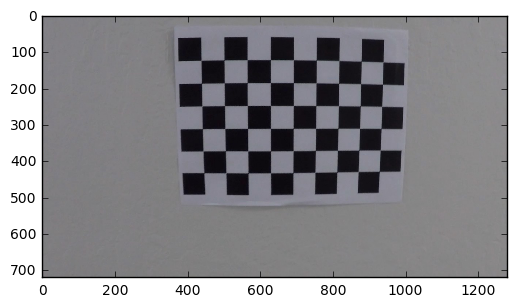

In [42]:
# Look at an image to see how many corners are in the chessboard 
test_image = mpimg.imread(images_path[np.random.randint(len(images_path))])
plt.imshow(test_image)

In [43]:
# Define the number of corners
nx = 9
ny = 6

# define the object points, these are the points that are on the chessboard
objp = np.zeros((ny * nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-2, 2) # x, y coordinates

In [44]:
# Now define the corners on the images
# The goal here is to map the imgpoints (which are the coordinates on the image) to our 
# predefined world coordinates

imgpoints = [] # these are the 3D points in the real world space
objpoints = [] # these are the 2D points in the image plane
chessboards_with_drawn_corners = []

for image_path in images_path:
    # if matplotlib is used
    image = mpimg.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    
    # if cv2 is used although we don't use it to plot as it can't plot inline
#     image = cv2.imread(image_path)
#     print(image)
#     break
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # note that we use BGR2GRAY 
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp) 
        chessboard_with_drawn_corners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        chessboards_with_drawn_corners.append(chessboard_with_drawn_corners) 
        
#         cv2.imshow('img', chessboard_with_drawn_corners)
#         cv2.waitKey(500)

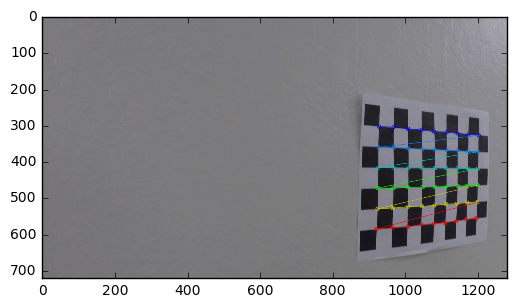

In [45]:
# Plot the chessboard with the corners drawn
plt.imshow(chessboards_with_drawn_corners[np.random.randint(len(chessboards_with_drawn_corners))])

In [46]:
# Finally calibrate the camera
test_image_path = os.path.join(CALIBRATION_FOLDER_NAME, "test_for_calibration.jpg")
test_image = plt.imread(test_image_path)
test_image_size = (test_image.shape[1], test_image.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_image_size, None, None)

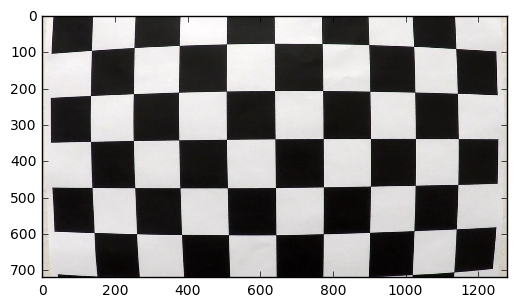

In [47]:
# Plot test image before applying undistorting
plt.imshow(test_image)

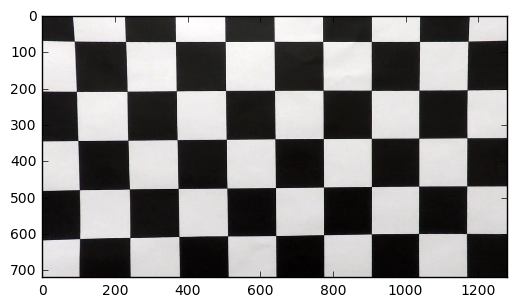

In [48]:
# Plot test image after applying undistortion
dest = cv2.undistort(test_image, mtx, dist, None, mtx)
plt.imshow(dest)

In [49]:
# Now lets aggregate these into a function

def calibrate_camera(calibration_image_paths, test_image_path, nx, ny):
    """
    The purpose of this function is to calibrate the camera, it returns the coordinate matrix
    and the distortion matrix
    :::params calibration_image_paths : the path of where the images are stored
              test_image_path : the path of the test image
              nx : number of corners in the x direction
              ny : number of corners in the y direction
              
    """
    # define the object points, these are the points that are on the chessboard
    objp = np.zeros((ny * nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-2, 2) # x, y coordinates
    
    # define the image points, these are the points that are in the real world
    # The goal here is to map the imgpoints (which are the coordinates on the image) to our 
    # predefined world coordinates

    imgpoints = [] # these are the 3D points in the real world space
    objpoints = [] # these are the 2D points in the image plane
    chessboards_with_drawn_corners = []

    for image_path in calibration_image_paths:
        
        # if matplotlib is used
        image = mpimg.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


        # if cv2 is used although we don't use it to plot as it can't plot inline
    #     image = cv2.imread(image_path)
    #     print(image)
    #     break
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # note that we use BGR2GRAY 

        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp) 
            chessboard_with_drawn_corners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            chessboards_with_drawn_corners.append(chessboard_with_drawn_corners)
        
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_image_size, None, None)
    return mtx, dist

In [50]:
# test it
CALIBRATION_FOLDER_NAME = "camera_cal"

# image paths for calibration images
calibration_image_paths = glob.glob(os.path.join(CALIBRATION_FOLDER_NAME, "calibration*.jpg"))

# image path for test image
test_image_path = os.path.join(CALIBRATION_FOLDER_NAME, "test_for_calibration.jpg")

# For the parameters for the calibration
mtx, dist = calibrate_camera(calibration_image_paths, test_image_path, 9, 6)

In [51]:
# plot the undistorted image
test_image = mpimg.imread(test_image_path)
dest = cv2.undistort(test_image, mtx, dist, None, mtx)

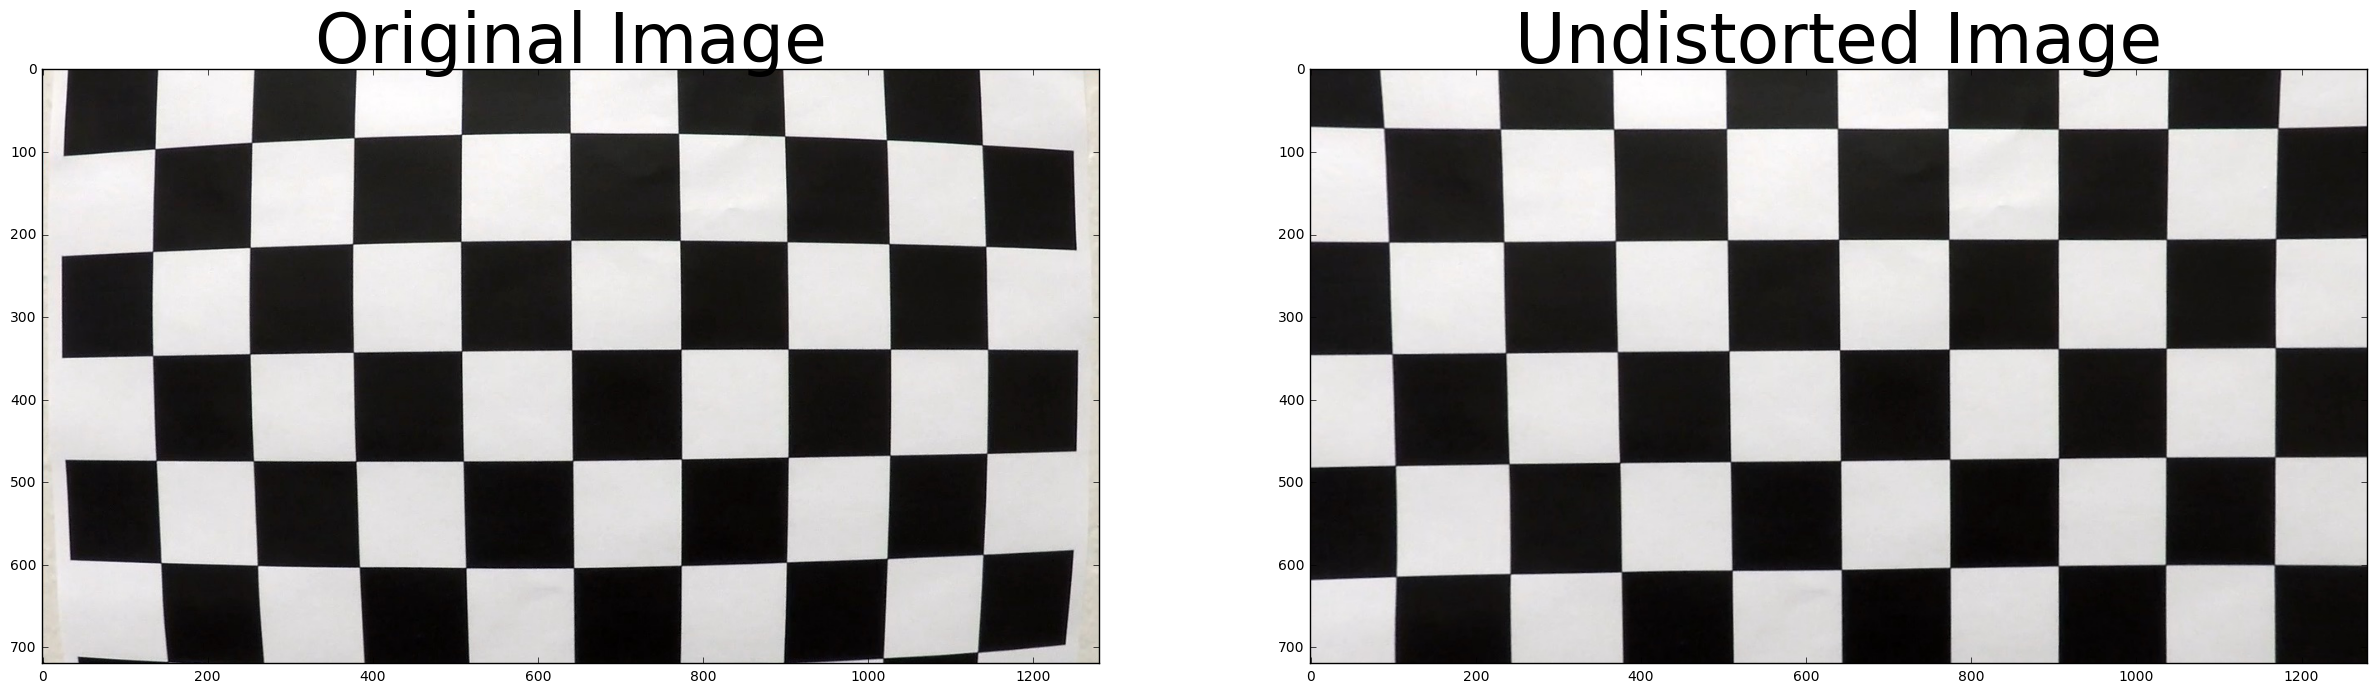

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 15))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dest)
ax2.set_title('Undistorted Image', fontsize=50)

In [57]:
# Test the calibrated camera on a road image
LANE_LINES_FOLDER_NAME = "test_images"
lane_line_image_paths = glob.glob(os.path.join(LANE_LINES_FOLDER_NAME, '*.jpg'))
lane_line_images = [mpimg.imread(lane_line_image_path) for lane_line_image_path in lane_line_image_paths]

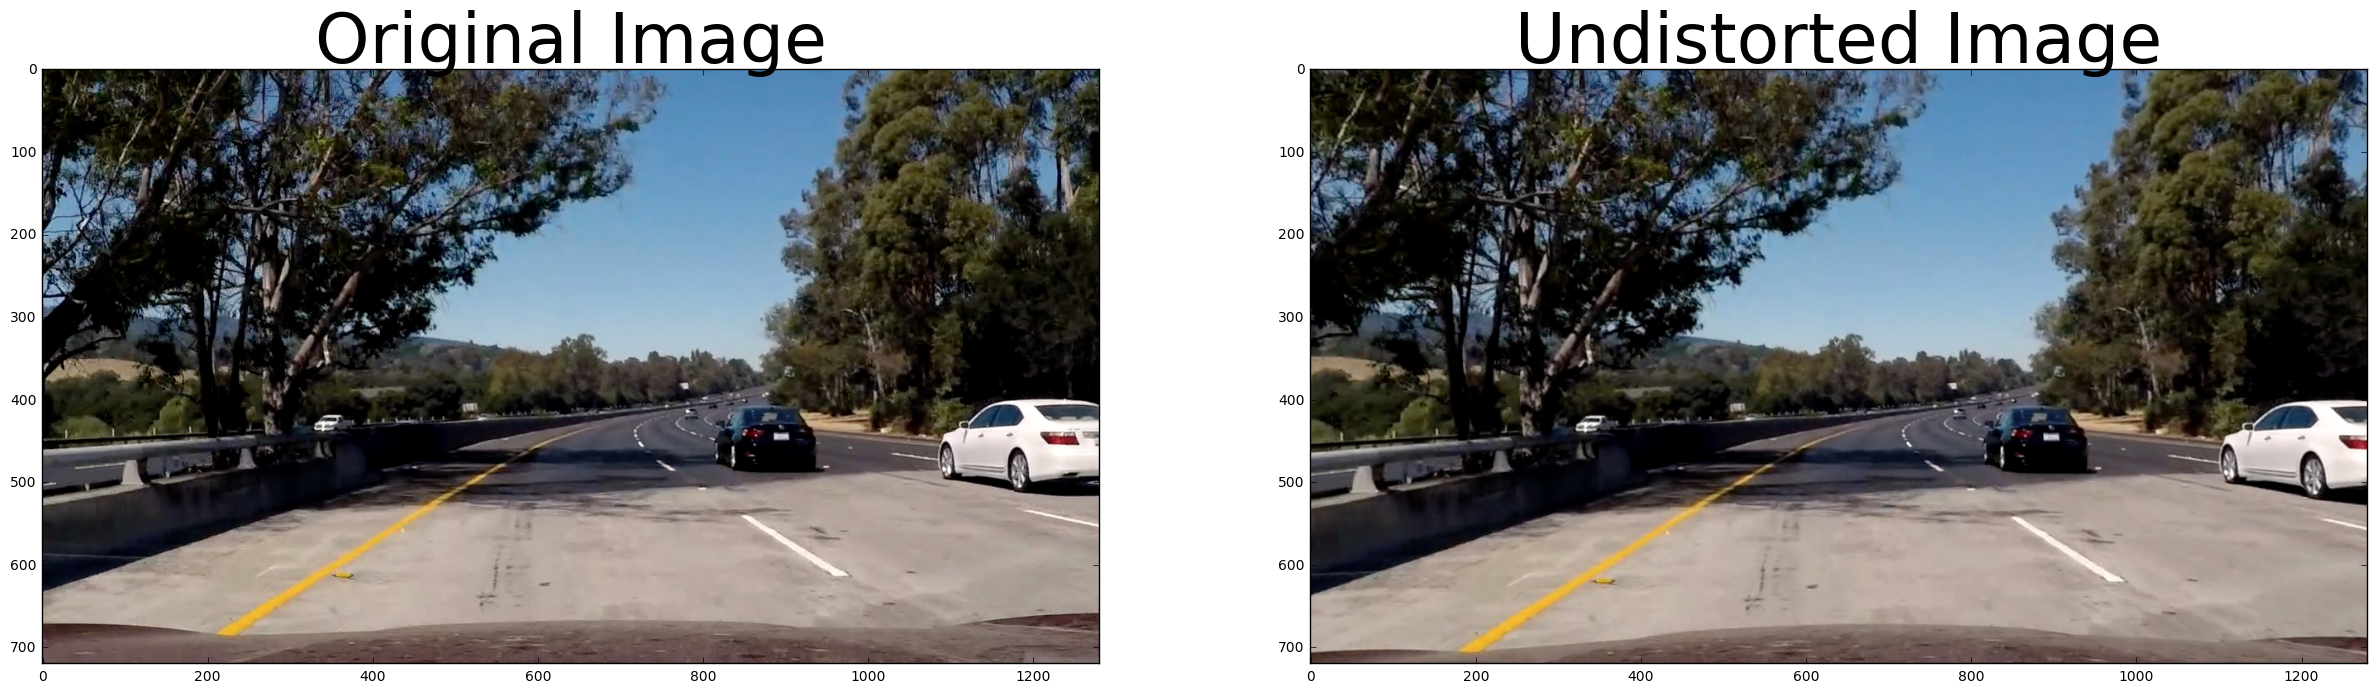

In [58]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 15))
# Plot a sample image
sample_lane_image = lane_line_images[6]
ax1.set_title('Original Image', fontsize=50)
ax1.imshow(sample_lane_image)

# and undistort the image
dest = cv2.undistort(sample_lane_image, mtx, dist, None, mtx)
ax2.imshow(dest)
ax2.set_title('Undistorted Image', fontsize=50)

## Doing the perspective transform

In [ ]:
# Define the size of the original image and the size of the image after
# the perspective transform

ORIGINAL_SIZE = 1280, 720
UNWARPED_SIZE = 1280, 720

def get_src_dst():    
    
    # images used to find the vanishing point
    straight_images = ["test_images/straight_lines1.jpg", "test_images/straight_lines2.jpg"]
    
    # define a triangle that represents the region of interest
    roi_points = np.array([[0, ORIGINAL_SIZE[1] - 50], \
                          [ORIGINAL_SIZE[0], ORIGINAL_SIZE[1] - 50], \
                          [ORIGINAL_SIZE[0]//2, ORIGINAL_SIZE[1]//2 + 50]], dtype = np.int32)
    
    # fill these points in
    roi = np.zeros((ORIGINAL_SIZE[1], ORIGINAL_SIZE[0]), dtype=np.uint8)
    cv2.fillPoly(roi, [roi_points], 1)

    # Define the matrix that are needed to calculate the vanishing point 
    Lhs = np.zeros((2,2), dtype = np.float32)
    Rhs = np.zeros((2,1), dtype = np.float32)

    # Find the straight lines in the image that correspond to the vanishing point
    for img_path in straight_images:
        img = mpimg.imread(img_path)
        img = cv2.undistort(img, mtx, dist)
        img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        edges = cv2.Canny(img_hls[:, :, 1], 100, 200)
        lines = cv2.HoughLinesP(edges * roi, 0.5, np.pi/180, 20, None, 180, 120)
        for line in lines:
            for x1, y1, x2, y2 in line:
                normal = np.array([[-(y2-y1)], [x2-x1]], dtype = np.float32)
    #             print(normal)
    #             print(np.sqrt(np.sum(np.square(normal))))
                normal /= np.linalg.norm(normal)
    #             print(normal)
                point = np.array([[x1], [y1]], dtype = np.float32)
                outer = np.matmul(normal, normal.T)
    #             print(outer)
                Lhs += outer
                Rhs += np.matmul(outer, point)
                cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), thickness = 2)

    # calculate the vanishing point
    vanishing_point = np.matmul(np.linalg.inv(Lhs), Rhs)
#     print(vanishing_point)

    # Find the source and destination points
    top = vanishing_point[1] + 60
    bottom = ORIGINAL_SIZE[1] - 35
    width = 530

    def on_line(p1, p2, ycoord):
        return[p1[0] + (p2[0] - p1[0])/float(p2[1] - p1[1]) * (ycoord-p1[1]), ycoord]

    p1 = [vanishing_point[0] - width/2, top]
    p2 = [vanishing_point[0] + width/2, top]
    p3 = on_line(p2, vanishing_point, bottom)
    p4 = on_line(p1, vanishing_point, bottom)


    src = np.array([p1,p2,p3,p4], dtype=np.float32)

    dst = np.array([[0, 0], [UNWARPED_SIZE[0], 0],
                           [UNWARPED_SIZE[0], UNWARPED_SIZE[1]],
                           [0, UNWARPED_SIZE[1]]], dtype=np.float32)
    return(src, dst)
print(get_src_dst())

In [ ]:
# Helper function for the transform
def warper(image, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    image_size = (image.shape[1], image.shape[0])
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR) 
    return(warped)

# Plot the points where the perspective transform is to take place
def plot_perspective_transform_points(image):
    src, dst = get_src_dst()
    plt.imshow(image)
    plt.title("Points of the persepctive transform")
    plt.plot(src[0][0], src[0][1], 'o')
    plt.plot(src[1][0], src[1][1], 'o')
    plt.plot(src[2][0], src[2][1], 'o')
    plt.plot(src[3][0], src[3][1], 'o')
    plt.show()

In [ ]:
# Plot the source points on the original image
plot_perspective_transform_points(dest)

In [ ]:
# Plot the transformed image
src, dst = get_src_dst()
warped_lane_line_image = warper(dest, src, dst)
plt.title("Perspective transformed image")
plt.imshow(warped_lane_line_image)

## Extracting the lane lines

#### Experiment with finding the most useful helpful channels

In [ ]:
# Create an image wrapper class for easier conversion between color spaces
RGB_COLOR_SPACE = "RGB"
HLS_COLOR_SPACE = "HLS"
LAB_COLOR_SPACE = "LAB"
SINGLE_COLOR_CHANNEL = "Single"

from enum import Enum
class ColorSpace(Enum): 
    RGB = RGB_COLOR_SPACE
    HLS = HLS_COLOR_SPACE
    LAB = LAB_COLOR_SPACE 
    
class ImageWrapper:
    """
    This class is a wrapper class that allows for easier conversion between
    color spaces
    """
    def __init__(self, image, color_space):
        self.image = image
        self.width = image.shape[1]
        self.height = image.shape[0]
        self.color_space = color_space
        
    def _set_color_space(self, new_color_space):
        if self.color_space == new_color_space:
            pass
        else:
            if new_color_space == ColorSpace.RGB:
                if self.color_space == ColorSpace.HLS:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_HLS2RGB)
                elif self.color_space == ColorSpace.LAB:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_LAB2RGB)     
                self.color_space = new_color_space
                
            elif new_color_space == ColorSpace.HLS:
                if self.color_space == ColorSpace.RGB:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2HLS)
                elif self.color_space == ColorSpace.LAB:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_LAB2RGB)
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2HLS)     
                self.color_space = new_color_space
                
            elif new_color_space == ColorSpace.LAB:
                if self.color_space == ColorSpace.RGB:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2LAB)
                elif self.color_space == ColorSpace.HLS:
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_HLS2RGB)
                    self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2LAB)
                self.color_space = new_color_space
            
            
    def get_RGB(self):
        self._set_color_space(ColorSpace.RGB)
        return(self.image)
    def get_R(self):
        self._set_color_space(ColorSpace.RGB)
        return(self.image[:,:,0])
    def get_G(self):
        self._set_color_space(ColorSpace.RGB)
        return(self.image[:,:,1])
    def get_B(self):
        self._set_color_space(ColorSpace.RGB)
        return(self.image[:,:,2])
   
    def get_HLS(self):
        self._set_color_space(ColorSpace.HLS)
        return(self.image)
    def get_H(self):
        self._set_color_space(ColorSpace.HLS)
        return(self.image[:,:,0])
    def get_L(self):
        self._set_color_space(ColorSpace.HLS)
        return(self.image[:,:,1])
    def get_S(self):
        self._set_color_space(ColorSpace.HLS)
        return(self.image[:,:,2]) 
    
    def get_LAB(self):
        self._set_color_space(ColorSpace.LAB)
        return(self.image)
    def get_l(self):
        self._set_color_space(ColorSpace.LAB)
        return(self.image[:,:,0])
    def get_a(self):
        self._set_color_space(ColorSpace.LAB)
        return(self.image[:,:,1])
    def get_b(self):
        self._set_color_space(ColorSpace.LAB)
        return(self.image[:,:,2]) 
    
    def get_gray(self):
        return(sel)

In [ ]:
from matplotlib.colors import hsv_to_rgb

def plot_all_color_channels(image):
    """
    The function simply plots all the different kinds of color channels so that 
    it is easier to visual which color channels are more useful
    """
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize = (30, 15))
    f.tight_layout()
    wspace = 0.25   # the amount of width reserved for blank space between subplots
    hspace = 0.25   # the amount of height reserved for white space between subplots
    f.subplots_adjust(wspace = wspace, hspace = hspace)
    font = {'size' : 30}
    ax1.imshow(image.get_R(), cmap = 'gray')
    ax1.set_title("R", fontdict=font)
    ax2.imshow(image.get_G(), cmap = 'gray')
    ax2.set_title("G", fontdict=font)
    ax3.imshow(image.get_B(), cmap = 'gray')
    ax3.set_title("B", fontdict = font)
    ax4.imshow(image.get_H(), cmap = 'gray')
    ax4.set_title("H", fontdict = font)
    ax5.imshow(image.get_L(), cmap = 'gray')
    ax5.set_title("L", fontdict = font)
    ax6.imshow(image.get_S(), cmap = 'gray')
    ax6.set_title("S", fontdict = font)
    
    ax7.imshow(image.get_l(), cmap = 'gray')
    ax7.set_title("L", fontdict = font)
    ax8.imshow(image.get_a(), cmap = 'gray')
    ax8.set_title("A", fontdict = font)
    ax9.imshow(image.get_b(), cmap = 'gray')
    ax9.set_title("B", fontdict = font)
    
    ax10.imshow(image.get_RGB())
    ax10.set_title("RGB", fontdict = font)
    ax11.imshow(hsv_to_rgb(image.get_HLS()))
    ax11.set_title("HLS", fontdict = font)
    ax12.imshow(image.get_LAB())
    ax12.set_title("LAB", fontdict = font)

In [ ]:
# First undistort the lane image
lane_line_images = [cv2.undistort(image, mtx, dist, None, mtx) for image in lane_line_images]
                    
# Now wrap them in the custom class created above
wrapped_lane_line_images = [ImageWrapper(image, ColorSpace.RGB) for image in lane_line_images]

In [ ]:
# Plot the images
sample_image = wrapped_lane_line_images[6]
plot_all_color_channels(sample_image)

It seems like the most useful channel are the S, and B channels to detect yellow lane lines which are in the shadow.

The HLS's L and R, G channels all do a good job at detect the white lane lines, even in the shadows

#### Experiment with various methods to find lane lines

In [ ]:
# Define the red channel for the sample image
sample_image_R = sample_image.get_R()

In [ ]:
# Define some generic helper functions and constants
UINT_8_MAX = 255

def scale_image(image, max_val):
    return((image/np.max(image) * max_val))

def binary_mask(image, threshold):
    """
    Takes in an image, and scales it to 0-255, then creates a binary image 
    where the active pixels are set according to the threshold
    
    :::params image: a (length x width) array (only 1 color channel)
              threshold: the numbers which determine the active pixels
    """
    # Get the absolute value of the pixels
    image = np.abs(image)

    # Scale to 0-255
    image = scale_image(image, UINT_8_MAX)
    binary_output = np.zeros_like(image)
    binary_output[(image >= threshold[0]) & (image <= threshold[1])] = 1
    return(binary_output.astype(np.uint8))

# Define a sobel helper function
def sobel_calc(image, kernel_size):
    """
    This function takes an image of a single color channel, and returns a 2-tuple of images
    with the first element of the tuple being the Sobel operator on the x axis, and the second
    element being the Sobel operator on the y axis
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = kernel_size) 
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = kernel_size)
    return((sobel_x), (sobel_y))

In [ ]:
def axis_threshold(image, axis, sobel_kernel, sobel_threshold):
    """
    Takes in an image and returns a binary image dependent on the mag_threshold
    :::params image: a (length x width) array (only 1 color channel)
              axis: the direction to apply the sobel operator, 0 is x, 1 is y
              sobel_kernel: the size of the sobel kernel
              sobel_threshold: the max and min sobel values which determines which pixels are active
    """
    image_sobel = sobel_calc(image, sobel_kernel)
    sobel_x = image_sobel[0]
    sobel_y = image_sobel[1]
    if (axis == 0):
        binary_output = binary_mask(sobel_x, sobel_threshold)
    else:
        binary_output = binary_mask(sobel_y, sobel_threshold)
    
    return(binary_output)

In [ ]:
# Example use:
axis_sobel_kernel_size = 3
ax_threshold = (30, 255)
sobel_x_R = axis_threshold(sample_image_R, 0, axis_sobel_kernel_size, ax_threshold)
sobel_y_R = axis_threshold(sample_image_R, 1, axis_sobel_kernel_size, ax_threshold)

In [ ]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sobel_x_R, cmap = 'gray')
ax2.imshow(sobel_y_R, cmap = 'gray')

In [ ]:
def magnitude_threshold(image, sobel_kernel, mag_threshold):
    """
    Takes in an image and returns a binary image dependent on the mag_threshold
    :::params image: a (length x width) array (only 1 color channel)
              sobel_kernel: the size of the sobel kernel
              mag_threshold: the max and min magnitudes which determines which pixels are active
    """
    # Get the x, y sobels
    image_sobel = sobel_calc(image, sobel_kernel)
    sobel_x = image_sobel[0]
    sobel_y = image_sobel[1]
    
    # Find the magnitude 
    mag = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    
    # Get a binary mask of the magnitude
    binary_output = binary_mask(mag, mag_threshold)
    
    return(binary_output)

In [ ]:
mag_threshold = (30, 255)
mag_sobel_kernel_size = 3
mag_R = magnitude_threshold(sample_image_R, mag_sobel_kernel_size, mag_threshold)
plt.imshow(mag_R, cmap = 'gray')

In [ ]:
def angle_threshold(image, sobel_kernel, angle_threshold):
    """
    Takes in an image and returns a binary image dependent on the mag_threshold
    :::params image: a (length x width) array (only 1 color channel)
              sobel_kernel: the size of the sobel kernel
              angle_threshold: the max and min angles which determines which pixels are active
    """
    # Apply sobel operator on the image
    image_sobel = sobel_calc(image, sobel_kernel)
    sobel_x = image_sobel[0]
    sobel_y = image_sobel[1]
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    angle = np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(angle)
    binary_output[(angle >= angle_threshold[0]) & (angle <= angle_threshold[1])] = 1
    return(binary_output.astype(np.uint8))

In [ ]:
# Test it
ang_threshold = (0.7, 1.3)# here pi/2 = 90 degrees so 90 degrees ~= 1.7
ang_sobel_kernel_size = 11
angle_R = angle_threshold(sample_image_R, ang_sobel_kernel_size, ang_threshold)

In [ ]:
plt.imshow(angle_R, cmap = 'gray')

Using these threshold functions plot the results of the:
* 1) S,and B channels to detect yellow lane lines which are in the shadow.
* 2) HLS's L and R, G channels all do a good job at detect the white lane lines, even in the shadows

In [ ]:
# Helper function to get the useful color channels 
def get_color_channels(image):
    R = image.get_R()
    G = image.get_G()
    S = image.get_S()
    l = image.get_l()
    b = image.get_b()
    return([R, G, S, l, b])

import matplotlib.gridspec as gridspec

def plot_thresholds(images, tophat = False):
    """
    This function plots the data using the output of get_data_in_bin
    
    params data: this is a list of data frame rows, one from each bin
    
    """
    
    # Define spacing between the plots
    fig = plt.figure(figsize=(30, 15))
    gs = gridspec.GridSpec(1,5)
    color_channels = ["R", "G", "S", "l", "b"]
   
    # loop through the 
    for i in range(len(images)):
        ax = fig.add_subplot(gs[i])
        
        # If we have a row from the data frame, then we need to extract 
        # the raw data 
        if not tophat:
            ax.imshow(images[i], cmap = 'gray')
        else:
            ax.imshow(images[i])
        ax.set_title(color_channels[i], fontdict = {'size' :30})
    gs.tight_layout(fig)
    plt.show()

In [ ]:
# Define the thresholds to be used`
sobel_threshold = (20, 255)
mag_threshold = (20, 255)
ang_threshold = (0.7, 1.2)

# Set the kernel sizes
axis_s_size = 5
angle_s_size = 5
mag_s_size = 5

In [ ]:
# Use all the thresholding techniques above on all the color channels
all_channels = get_color_channels(sample_image)
axis_x_thresholded_images = [axis_threshold(image, 0, sobel_kernel = axis_s_size, \
                                            sobel_threshold = sobel_threshold) for image in all_channels]
axis_y_thresholded_images = [axis_threshold(image, 1, sobel_kernel = axis_s_size, \
                                            sobel_threshold = sobel_threshold) for image in all_channels]
magnitude_thresholded_images = [magnitude_threshold(image, sobel_kernel = mag_s_size, \
                                                    mag_threshold = mag_threshold) for image in all_channels]
angle_thresholded_images = [angle_threshold(image, sobel_kernel = angle_s_size, \
                                            angle_threshold = ang_threshold) for image in all_channels]

In [ ]:
plot_thresholds(all_channels)

In [ ]:
plot_thresholds(axis_x_thresholded_images)

In [ ]:
plot_thresholds(axis_y_thresholded_images)

In [ ]:
plot_thresholds(magnitude_thresholded_images)

In [ ]:
plot_thresholds(angle_thresholded_images)

In [ ]:
useful_images = [axis_x_thresholded_images[0], \
                 axis_x_thresholded_images[1], \
                 axis_x_thresholded_images[3], \
                 axis_x_thresholded_images[4], \
                 axis_y_thresholded_images[4],\
                 magnitude_thresholded_images[4]] 


In [ ]:
stacked = np.zeros_like(useful_images[0])
for image in useful_images:
    stacked[(image == 1)] += 1

In [ ]:
plt.imshow(stacked, cmap = 'gray')
plt.title("Stacked image", fontsize = 30)

In [ ]:
non_tophat_binary_image = np.zeros_like(stacked)
non_tophat_binary_image[stacked >= (len(useful_images)/2)] = 1
plt.imshow(non_tophat_binary_image, cmap = 'gray')
plt.title("Thresholded stacked image")

* Seems like the LAB's b channel and HLS's s channel are pretty good for detecting the yellow lane lines. 
* The HLS's s channel also seems to do a good job in detecting the white lane lines on a grey surface

#### Use a tophat and erode and see if it makes the lane lines clearer

In [ ]:
# Define the morphological transforms
def erode(image, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))):
    return(cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel))

def tophat(image, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))):
    return(cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel))

def close(image, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))):
    return(cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel))

def median_filter(image, filter_size):
    return(cv2.medianBlur(image, filter_size))

def adaptive_transform(image, blocksize, C):
    return(cv2.adaptiveThreshold(image, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                         cv2.THRESH_BINARY, blocksize, C))

In [ ]:
# Seems a bit noist on the edge 
close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
non_tophat_binary_image = close(non_tophat_binary_image, close_kernel)

In [ ]:
plt.imshow(non_tophat_binary_image, cmap = 'gray')

In [ ]:
non_tophat_binary_image = erode(non_tophat_binary_image)

In [ ]:
plt.imshow(non_tophat_binary_image, cmap = 'gray')

In [ ]:
def get_non_tophat_binary_image(wrapped_image):
    
    # Define the thresholds to be used
    sobel_threshold = (20, 255)
    mag_threshold = (20, 255)
    ang_threshold = (0.7, 1.2)

    # Set the kernel sizes
    axis_s_size = 5
    angle_s_size = 5
    mag_s_size = 5
    smoothing_k_size = 5
        
    # Do the thresholding for the images
    all_channels = get_color_channels(wrapped_image)
    axis_x_thresholded_images = [axis_threshold(image, 0, sobel_kernel = axis_s_size, \
                                                sobel_threshold = sobel_threshold) for image in all_channels]
    axis_y_thresholded_images = [axis_threshold(image, 1, sobel_kernel = axis_s_size, \
                                                sobel_threshold = sobel_threshold) for image in all_channels]
    magnitude_thresholded_images = [magnitude_threshold(image, sobel_kernel = mag_s_size, \
                                                        mag_threshold = mag_threshold) for image in all_channels]
    angle_thresholded_images = [angle_threshold(image, sobel_kernel = angle_s_size, \
                                                angle_threshold = ang_threshold) for image in all_channels]
    
    
    # select the useful images
    useful_images = [axis_x_thresholded_images[0], \
                 axis_x_thresholded_images[1], \
                 axis_x_thresholded_images[3], \
                 axis_x_thresholded_images[4], \
                 axis_y_thresholded_images[4],\
                 magnitude_thresholded_images[4]] 

    
    stacked = np.zeros_like(useful_images[0])
#     plt.imshow(stacked, cmap = 'gray')
    
    for image in useful_images:
        stacked[(image == 1)] += 1
        
    non_tophat_binary_image = np.zeros_like(stacked)
    non_tophat_binary_image[stacked >= (len(useful_images)/2)] = 1
    
    close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    non_tophat_binary_image = erode(close(non_tophat_binary_image, close_kernel))

    return(non_tophat_binary_image.astype(np.uint8))  

In [ ]:
non_tophat_binary_image = get_non_tophat_binary_image(sample_image)
plt.imshow(non_tophat_binary_image, cmap = 'gray')

#### Try using the tophat transform

In [ ]:
# Tophat transform all the images
tophat_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
all_channels_tophat = [tophat(image, tophat_kernel) for image in all_channels]
axis_x_thresholded_images = [axis_threshold(image, 0, sobel_kernel = axis_s_size, sobel_threshold = sobel_threshold) for image in all_channels_tophat]
axis_y_thresholded_images = [axis_threshold(image, 1, sobel_kernel = axis_s_size, sobel_threshold = sobel_threshold) for image in all_channels_tophat]
magnitude_thresholded_images = [magnitude_threshold(image, sobel_kernel = mag_s_size, mag_threshold = mag_threshold) for image in all_channels_tophat]
angle_thresholded_images = [angle_threshold(image, sobel_kernel = angle_s_size, angle_threshold = ang_threshold) for image in all_channels_tophat]

In [ ]:
plot_thresholds(all_channels_tophat, tophat = True)

In [ ]:
plot_thresholds(axis_x_thresholded_images)

In [ ]:
plot_thresholds(axis_y_thresholded_images)

In [ ]:
plot_thresholds(magnitude_thresholded_images)

In [ ]:
plot_thresholds(angle_thresholded_images)

* Use HLS's L channel, and the LAB's L and B channel to try to find the lane lines 
* But first try to get rid of the horizontal noise by using the axis_threshold function

In [ ]:
def stacked_tophat(wrapped_image, kernel):
    L_channel = wrapped_image.get_L()
    l_channel = wrapped_image.get_l() 
    b_channel = wrapped_image.get_b()
#     plt.imshow(tophat(b_channel, kernel))
#     ang_threshold = (0.7, 1.2)
#     angle_sobel_size = 5
#     median_filter_size = 11
#     angle_thresholded_b_channel = median_filter(angle_threshold(b_channel, angle_sobel_size, \
#                                                   ang_threshold), median_filter_size)
    tophat_L = scale_image(tophat(L_channel, kernel), 255)
    tophat_l = scale_image(tophat(l_channel, kernel), 255)
    tophat_b = scale_image(tophat(b_channel, kernel), 255)
# #     angle_thresholded_b_channel = scale_image(angle_thresholded_b_channel, 255)
#     # Note here that we add tophat_b twice as only the b channel detects the yellow lane lines
    stacked_tophat = scale_image(tophat_L + tophat_l + \
                                 tophat_b, \
                                 255).astype(np.uint8)
    return(stacked_tophat)
# stacked_tophat_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (19, 19))
# stacked_tophat(sample_image, stacked_tophat_kernel)

In [ ]:
# First stack the tophat images
stacked_tophat_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
stacked_tophat_image = stacked_tophat(sample_image, stacked_tophat_kernel)

# Remove the x noise
sobel_kernel = 5
sobel_threshold = (10, 80)
stacked_tophat_image_x_removed = axis_threshold(stacked_tophat_image, 0, sobel_kernel, sobel_threshold)

# Remove the salt and pepper noise
filter_size = 5
stacked_tophat_image_x_sp_removed = median_filter(stacked_tophat_image_x_removed, filter_size)

# Morphological close
close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
close_stacked_tophat_image_x_sp_removed = close(stacked_tophat_image_x_sp_removed, close_kernel)

# Plot the images in each stage
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 15))
ax1.imshow(stacked_tophat_image, cmap = 'gray')
ax2.imshow(stacked_tophat_image_x_removed)
ax3.imshow(stacked_tophat_image_x_sp_removed)
ax4.imshow(close_stacked_tophat_image_x_sp_removed)
# plt.imshow(close(axis_threshold(stacked_tophat_image, 0, sobel_kernel, sobel_threshold), close_kernel))
# adapt_stacked_tophat_image = cv2.adaptiveThreshold(stacked_tophat_image, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, -9) 
# plt.imshow(adapt_stacked_tophat_image)

In [ ]:
def get_tophat_binary_image(wrapped_image):
    stacked_tophat_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
    stacked_tophat_image = stacked_tophat(wrapped_image, stacked_tophat_kernel)

    # Remove the x noise
    sobel_kernel = 5
    sobel_threshold = (10, 80)
    stacked_tophat_image_x_removed = axis_threshold(stacked_tophat_image, 0, sobel_kernel, sobel_threshold)

    # Remove the salt and pepper noise
    filter_size = 5
    stacked_tophat_image_x_sp_removed = median_filter(stacked_tophat_image_x_removed, filter_size)

    # Morphological close
    close_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    close_stacked_tophat_image_x_sp_removed = close(stacked_tophat_image_x_sp_removed, close_kernel)
    return(close_stacked_tophat_image_x_sp_removed)

In [ ]:
tophat_binary_image = get_tophat_binary_image(sample_image)
plt.imshow(tophat_binary_image, cmap = 'gray')

In [ ]:
# First do the persective transform
non_tophat_binary_warped = warper(non_tophat_binary_image, src, dst)
tophat_binary_warped = warper(tophat_binary_image, src, dst)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 15))
ax1.imshow(non_tophat_binary_warped, cmap = 'gray')
ax2.imshow(tophat_binary_warped, cmap = 'gray')

Take a look at the two kinds of transforms for all the images

In [ ]:
non_tophat_binary_warped_images = [warper(get_non_tophat_binary_image(image), src, dst) \
                                   for image in wrapped_lane_line_images]
tophat_binary_warped_images = [warper(get_tophat_binary_image(image), src, dst) \
                        for image in wrapped_lane_line_images]
original_images = [cv2.cvtColor(image.get_RGB(),cv2.COLOR_RGB2GRAY) for image in wrapped_lane_line_images]

In [ ]:
fig = plt.figure(figsize = (30, 15))
gs = gridspec.GridSpec(8, 3)
for i, images in enumerate(zip(non_tophat_binary_warped_images,\
                  tophat_binary_warped_images,\
                  original_images)):
    for j, image in enumerate(images):
        ax = fig.add_subplot(gs[i,j])
        ax.imshow(image, cmap = 'gray')
gs.tight_layout(fig)
plt.show()

In [ ]:
# Seems like the non_tophat_binary_warped_images looks better
binary_warped = warper(get_non_tophat_binary_image(sample_image), src, dst)
plt.title("Binary warped image")
plt.imshow(binary_warped, cmap = 'gray')

## Finding the lane lines

In [ ]:
# Get the histogram of the pixel values for the bottom half of the image
hist = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis = 0)
plt.plot(hist)

In [ ]:
# Convert the image to RGB
out_image = (np.dstack((binary_warped, binary_warped, binary_warped)) * 255).astype(np.uint8)
print(out_image.shape)
print(out_image[0:1])
plt.imshow(out_image)

In [ ]:
# Find the base of the lines
midpoint = np.int(UNWARPED_SIZE[0]/2)
base_left_x = np.argmax(hist[:midpoint])
base_right_x = np.argmax(hist[midpoint:]) + midpoint
print("Base of left lane is: {0}\nBase of right lane is: {1}"\
      .format(base_left_x, base_right_x))

In [ ]:
# Get the height for the sliding window
n_windows = 9
window_height = np.int(binary_warped.shape[0]/n_windows)

In [ ]:
# Identify the x and y positions of all non-zero pixels in the image
# These values are stored in nonzeroy and nonzerox, so the first element of nonzerox, and nonzeroy would give the 
# first coordinate that has a nonzero
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

In [ ]:
# Current positions
current_left_x = base_left_x
current_right_x = base_right_x

# Set the width of the windows
width = 50

# Set the minimum number of pixels found to recenter the window
minpix = 50

# Create empty lists to receive the left and right lane pixel indcies
left_lane_idx = []
right_lane_idx = []

In [ ]:
# Step through the windows one by one
for window in range(n_windows):
    # Height for the windows
    win_y_low = binary_warped.shape[0] - (window + 1) * window_height
    win_y_high = binary_warped.shape[0] - window * window_height
    
    # starting and ending x coordinates of the window for the left lane line
    win_x_left_low = current_left_x - width
    win_x_left_high = current_left_x + width
    
    # starting and ending x coordinates of the window for the right lane line
    win_x_right_low = current_right_x - width
    win_x_right_high = current_right_x + width
    
    # Draw green rectangles on the RGB transformed image
    cv2.rectangle(out_image, (win_x_left_low, win_y_low), (win_x_left_high, win_y_high), (0, 255, 0), 2)
    cv2.rectangle(out_image,(win_x_right_low,win_y_low),(win_x_right_high,win_y_high),(0,255,0), 2) 

    # Identify the indexes of nonzero pixels in the nonzerox, and nonzeroy arrays
    # note that the index will have all the combinations of x, and y coordinates that are non-zero
    # within our specified window
    good_left_idx = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & \
                     (nonzerox >= win_x_left_low) & (nonzerox < win_x_left_high)).nonzero()[0]
    good_right_idx = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & \
                      (nonzerox >= win_x_right_low) & (nonzerox < win_x_right_high)).nonzero()[0]
    
#     print(good_left_idx)
#     print(good_right_idx)
    
    # Append these indices to the lists
    left_lane_idx.append(good_left_idx)
    right_lane_idx.append(good_right_idx)
    
    if len(good_left_idx) > minpix:
        current_left_x = np.int(np.mean(nonzerox[good_left_idx]))
    if len(good_right_idx) > minpix:
        current_right_x = np.int(np.mean(nonzerox[good_right_idx]))

In [ ]:
# Concatenate the arrays of indices which represent the nonzero elements int he 

left_lane_idx = np.concatenate(left_lane_idx)
right_lane_idx = np.concatenate(right_lane_idx)

# Extract left and right line pixel positions
left_x = nonzerox[left_lane_idx]
left_y = nonzeroy[left_lane_idx] 
right_x = nonzerox[right_lane_idx]
right_y = nonzeroy[right_lane_idx] 


In [ ]:
plt.imshow(out_image)

In [ ]:
# Convert from pixel space to meters
Y_M_PER_PIXEL = 30/720 # 720 is the height of the image
X_M_PER_PIXEL = 3.7/700 # 700 is the width of the lane in pixel 

def find_poly_fit_with_window(binary_warped):
    # Get the histogram of the pixel values for the bottom half of the image
    hist = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis = 0)
    
    # Turn the binary image into RGB
    out_image = (np.dstack((binary_warped, binary_warped, binary_warped)) * 255).astype(np.uint8)
    
    # Find the base of the lines
    midpoint = np.int(UNWARPED_SIZE[0]/2)
    base_left_x = np.argmax(hist[:midpoint])
    base_right_x = np.argmax(hist[midpoint:]) + midpoint

    # Get the height for the sliding window
    n_windows = 9
    window_height = np.int(binary_warped.shape[0]/n_windows)

    # The some_array.nonzero() functions return d lists where d is the number of dimensions in the some_array
    # Use this to identify the x and y positions of all non-zero pixels in the image
    
    # These values are stored in nonzeroy and nonzerox, so the first element of nonzerox, and nonzeroy would give the 
    # first coordinate that has a nonzero pixel i.e.the pixel is not black
    nonzero = binary_warped.nonzero() # returns 2 lists of the same length, each list contains the indexes of nonzero elements
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    

    # Current positions
    current_left_x = base_left_x
    current_right_x = base_right_x

    # Set the width of the windows
    width = 100

    # Set the minimum number of pixels found to recenter the window
    minpix = 50

    # Create empty lists to receive the left and right lane pixel indcies
    left_lane_idx = []
    right_lane_idx = []

    # Step through the windows one by one
    for window in range(n_windows):
        # Height for the windows
        win_y_low = binary_warped.shape[0] - (window + 1) * window_height
        win_y_high = binary_warped.shape[0] - window * window_height

        # starting and ending x coordinates of the window for the left lane line
        win_x_left_low = current_left_x - width
        win_x_left_high = current_left_x + width

        # starting and ending x coordinates of the window for the right lane line
        win_x_right_low = current_right_x - width
        win_x_right_high = current_right_x + width

        # Draw green rectangles on the RGB transformed image
        cv2.rectangle(out_image, (win_x_left_low, win_y_low), (win_x_left_high, win_y_high), (0, 255, 0), 2)
        cv2.rectangle(out_image, (win_x_right_low, win_y_low), (win_x_right_high, win_y_high), (0, 255, 0), 2) 

        # Identify the indexes of nonzero pixels in the nonzerox, and nonzeroy arrays
        # note that the index will all the combinations of x, and y coordinates that are non-zero
        
        # As some_array >= some_condition returns a boolean array we can & these arrays together, and
        # find the indexes of the nonzeroy, and nonzerox arrays that satisfy these conditions, noting
        # that the nonzery and nonzerox arrays themselves are the actual coordinates of the pixels that
        # aren't 0. Hence, we are able to find the coordinates in the original image that aren't black and 
        # also in our specfied window

        good_left_idx = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & \
                         (nonzerox >= win_x_left_low) & (nonzerox < win_x_left_high)).nonzero()[0]
        good_right_idx = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & \
                          (nonzerox >= win_x_right_low) & (nonzerox < win_x_right_high)).nonzero()[0]
        
        # Append all the indexes that are non-zero within the window into an array
        # so that they can be used for coloring later
        left_lane_idx.append(good_left_idx)
        right_lane_idx.append(good_right_idx)
        
        # If there are enough pixels in this window, then move the window to the middle of those pixels
        if len(good_left_idx) > minpix:
            current_left_x = np.int(np.mean(nonzerox[good_left_idx]))
        if len(good_right_idx) > minpix:
            current_right_x = np.int(np.mean(nonzerox[good_right_idx]))
            
    # Concatenate the arrays of indices, as it is a list of lists due to 
    # appending good_left_idx/good_right_idx to the array
    left_lane_idx = np.concatenate(left_lane_idx)
    right_lane_idx = np.concatenate(right_lane_idx)

    # Extract left and right line pixel positions
    left_x = nonzerox[left_lane_idx]
    left_y = nonzeroy[left_lane_idx] 
    right_x = nonzerox[right_lane_idx]
    right_y = nonzeroy[right_lane_idx] 
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(left_y, left_x, 2)
    right_fit = np.polyfit(right_y, right_x, 2)
    
    # Extract left and right line pixel positions
    left_x_m = nonzerox[left_lane_idx] * X_M_PER_PIXEL
    left_y_m = nonzeroy[left_lane_idx] * Y_M_PER_PIXEL
    right_x_m = nonzerox[right_lane_idx] * X_M_PER_PIXEL
    right_y_m = nonzeroy[right_lane_idx] * Y_M_PER_PIXEL 

    # Fit a second order polynomial to each
    left_fit_m = np.polyfit(left_y_m, left_x_m, 2)
    right_fit_m = np.polyfit(right_y_m, right_x_m, 2)
    
    return(left_fit, right_fit, left_fit_m, right_fit_m, left_lane_idx, right_lane_idx)

In [ ]:
# Test our function
left_fit, right_fit, left_fit_m, right_fit_m, left_lane_idx, right_lane_idx = find_poly_fit_with_window(binary_warped) 
plt.imshow(binary_warped, cmap = 'gray')

In [ ]:
def find_poly_fit_after_initial_window(binary_warped, left_fit, right_fit):
    """
    Takes a binary warped that is perspective transformed which the polynomial
    fitted lane lines and outputs the new coefficients for the left and right lane lines
    
    :::params binary_warped: a perspective transformed binary image 
    
              left_fit: the coefficients of the polynomial fit for the left lane line
              
              right_fit: the coefficients of the polynomial fit for the right lane line
    """
    # Get the coordinates of the non-zero pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    
    # Get the left and right lane indexes
    left_lane_idx = ((nonzerox > (left_fit[0]*(nonzeroy**2) + \
                                   left_fit[1]*nonzeroy + left_fit[2] - margin))
                      & (nonzerox < (left_fit[0]*(nonzeroy**2) + \
                                     left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_idx = ((nonzerox > (right_fit[0]*(nonzeroy**2) + \
                                    right_fit[1]*nonzeroy + right_fit[2] - margin)) &
                       (nonzerox < (right_fit[0]*(nonzeroy**2) + \
                                    right_fit[1]*nonzeroy + right_fit[2] + margin)))  
    
    # Extract left and right line pixel positions
    left_x = nonzerox[left_lane_idx]
    left_y = nonzeroy[left_lane_idx] 
    right_x = nonzerox[right_lane_idx]
    right_y = nonzeroy[right_lane_idx] 
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(left_y, left_x, 2)
    right_fit = np.polyfit(right_y, right_x, 2)
    
    # Extract left and right line pixel positions
    left_x_m = nonzerox[left_lane_idx] * X_M_PER_PIXEL
    left_y_m = nonzeroy[left_lane_idx] * Y_M_PER_PIXEL
    right_x_m = nonzerox[right_lane_idx] * X_M_PER_PIXEL
    right_y_m = nonzeroy[right_lane_idx] * Y_M_PER_PIXEL 

    # Fit a second order polynomial to each
    left_fit_m = np.polyfit(left_y_m, left_x_m, 2)
    right_fit_m = np.polyfit(right_y_m, right_x_m, 2)
    
    return(left_fit, right_fit, left_fit_m, right_fit_m, left_lane_idx, right_lane_idx)

## Plotting the lane lines

In [ ]:
# Fit a second order polynomial to each
left_fit = np.polyfit(left_y, left_x, 2)
right_fit = np.polyfit(right_y, right_x, 2)

# Visualize the results
plot_y = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
left_fit_x = left_fit[0] * plot_y ** 2 + left_fit[1] * plot_y + left_fit[2]
right_fit_x = right_fit[0] * plot_y ** 2 + right_fit[1] * plot_y + right_fit[2]

# Color the left and right lane lines
out_image[nonzeroy[left_lane_idx], nonzerox[left_lane_idx]] = [255, 0, 0]
out_image[nonzeroy[right_lane_idx], nonzerox[right_lane_idx]] = [0, 0 ,255]

# Plot the image with the lane lines
plt.imshow(out_image)
plt.plot(left_fit_x, plot_y, color='yellow')
plt.plot(right_fit_x, plot_y, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [ ]:
def get_fitted_lines(binary_warped, left_fit, right_fit):
    
    # Get data needed for visualization
    plot_y = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    left_fit_x = left_fit[0] * plot_y ** 2 + left_fit[1] * plot_y + left_fit[2]
    right_fit_x = right_fit[0] * plot_y ** 2 + right_fit[1] * plot_y + right_fit[2]
    return(plot_y, left_fit_x, right_fit_x)
    
 
def plot_fitted_lane_lines(binary_warped, plot_y, left_fit_x, right_fit_x, left_lane_idx, right_lane_idx):
    
    # Get the fitted coordinates
    plot_y, left_fit_x, right_fit_x = get_fitted_lines(binary_warped, left_fit, right_fit)
    
    # Create the RGB image
    out_image = (np.dstack((binary_warped, binary_warped, binary_warped)) * 255).astype(np.uint8)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Color the left and right lane lines
    out_image[nonzeroy[left_lane_idx], nonzerox[left_lane_idx]] = [255, 0, 0]
    out_image[nonzeroy[right_lane_idx], nonzerox[right_lane_idx]] = [0, 0 ,255]

    # Plot the image with the lane lines
    plt.imshow(out_image)
    plt.title("Binary warped fitted lines")
    plt.plot(left_fit_x, plot_y, color='yellow')
    plt.plot(right_fit_x, plot_y, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)

In [ ]:
# Test our function for plotting
plot_y, left_fit_x, right_fit_x = get_fitted_lines(binary_warped, left_fit, right_fit)
plot_fitted_lane_lines(binary_warped, plot_y, left_fit_x, right_fit_x, left_lane_idx, right_lane_idx)

## Finding the curvature

In [ ]:
# Define y-value where we want radius of curvature
# Choose the max y value (which corresponds to the bottom fo the image)
def find_curvature(y_eval, fit):
    curvature = ((1 + (2*fit[0]*y_eval + fit[1])**2)**1.5) / np.absolute(2*fit[0])
    return(curvature)

y_eval = np.max(plot_y)
print(binary_warped.shape[0]-1)
left_curve_rad = find_curvature(y_eval, left_fit) 
right_curve_rad = find_curvature(y_eval, right_fit)
print(left_curve_rad, right_curve_rad)

In [ ]:
# Fit new polynomials to x,y in world space

# First convert the nonzero points in pixel space to world space
nonzero = binary_warped.nonzero()
nonzeroy = nonzero[0]
nonzerox = nonzero[1]

# Extract left and right line pixel positions
left_x_m = nonzerox[left_lane_idx] * X_M_PER_PIXEL
left_y_m = nonzeroy[left_lane_idx] * Y_M_PER_PIXEL
right_x_m = nonzerox[right_lane_idx] * X_M_PER_PIXEL
right_y_m = nonzeroy[right_lane_idx] * Y_M_PER_PIXEL 

# Fit a second order polynomial to each
left_fit_m = np.polyfit(left_y_m, left_x_m, 2)
right_fit_m = np.polyfit(right_y_m, right_x_m, 2)

# Find the curvature
y_eval_m = y_eval * Y_M_PER_PIXEL
left_curve_rad_m = find_curvature(y_eval_m, left_fit_m)
right_curve_rad_m = find_curvature(y_eval_m, right_fit_m)
print(left_curve_rad_m, right_curve_rad_m)

## Finding the offset

In [ ]:
def find_offset(left_fit_x, right_fit_x):
    left_line_base_x = left_fit_x[-1]
    right_line_base_x = right_fit_x[-1]
    lane_midpoint_x = (left_line_base_x + right_line_base_x)/2.0
    car_x = 1280/2
    return((car_x - lane_midpoint_x) * X_M_PER_PIXEL)

find_offset(left_fit_x, right_fit_x)

## Filling in the lane lines

In [ ]:
# Drawing the lines back down onto the road

# First create an image to draw on
wrap_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((wrap_zero, wrap_zero, wrap_zero))

In [ ]:
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fit_x, plot_y]))]) # or use np.dstack instead of np.transpose
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fit_x, plot_y])))])
pts = np.hstack((pts_left, pts_right))

In [ ]:
# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0, 255,0))
new_warp = warper(color_warp, dst, src)

In [ ]:
# Plot final result 
result = cv2.addWeighted(sample_image.get_RGB(), 1, new_warp, 0.3, 0)
plt.imshow(result)

In [ ]:
def fill_lane_lines(original_image, binary_warped, plot_y, left_fit_x, right_fit_x, dst, src):
    
    # First create a blank image
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warped = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Now format the data in a way that cv2.polyfill works
    pts_left = np.array([np.transpose(np.vstack([left_fit_x, plot_y]))]) # or use np.dstack instead of np.transpose
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fit_x, plot_y])))])
    pts = np.hstack((pts_left, pts_right)) 
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warped, np.int_([pts]), (0, 255,0))
    new_warp = warper(color_warped, dst, src)
    
    result = cv2.addWeighted(original_image, 1, new_warp, 0.3, 0)
    return(result)

In [ ]:
# Test to see that the function works
plt.imshow(fill_lane_lines(sample_image.get_RGB(), binary_warped, plot_y, left_fit_x, right_fit_x, dst, src))

## The final image pipeline

First get the distortion matrix for camera

In [ ]:
CALIBRATION_FOLDER_NAME = "camera_cal"

# image paths for calibration images
calibration_image_paths = glob.glob(os.path.join(CALIBRATION_FOLDER_NAME, "calibration*.jpg"))

# image path for test image
test_image_path = os.path.join(CALIBRATION_FOLDER_NAME, "test_for_calibration.jpg")

# For the parameters for the calibration
mtx, dist = calibrate_camera(calibration_image_paths, test_image_path, 9, 6)

Define the image to be used

In [ ]:
image = lane_line_images[0]
sample_image = ImageWrapper(image, ColorSpace.RGB)
plt.imshow(image)

Now extract the lane lines

In [ ]:
binary_warped = warper(get_non_tophat_binary_image(sample_image), src, dst)
binary_warped[:,0:200] = 0
binary_warped[:,1080:1280] = 0
plt.imshow(binary_warped, cmap = 'gray')

Get the coefficients for the lane line fits

In [ ]:
left_fit, right_fit, right_fit_m, left_fit_m, left_lane_idx, right_lane_idx = find_poly_fit_with_window(binary_warped) 

Find the curvature

In [ ]:
# Convert from pixel space to meters
Y_M_PER_PIXEL = 30/720 # 720 is the height of the image
X_M_PER_PIXEL = 3.7/700 # 700 is the width of the lane in pixel 

y_eval = float(binary_warped.shape[0]-1.0) * Y_M_PER_PIXEL
left_curvature = find_curvature(y_eval, left_fit_m)
right_curvature = find_curvature(y_eval, right_fit_m)

print(left_curvature, right_curvature)

Find the offset

In [ ]:
offset = find_offset(left_fit_x, right_fit_x)
offset = np.round(offset, 2)
if offset < 0:
    offset_text = str(offset) + " meters left of the center of lane"
else:
    offset_text = str(offset) + " meters right of the center of lane"
print(offset)
print(offset_text)

Filling in the lane lines

In [ ]:
filled_lane_line_image = fill_lane_lines(sample_image.get_RGB(), binary_warped, plot_y, left_fit_x, right_fit_x, dst, src)

# Write some Text
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(filled_lane_line_image,'Offset is: {0}'.format(offset_text),(50,50), font, 1,(255,255,255),2)
cv2.putText(filled_lane_line_image,'Left curvature is: {0}'.format(left_curvature),(50,100), font, 1,(255,255,255),2)
cv2.putText(filled_lane_line_image,'Right curvature is: {0}'.format(right_curvature),(50,150), font, 1,(255,255,255),2)
    
plt.imshow(filled_lane_line_image)

In [ ]:
# Define a helper class for us to keep track of the lines

# Convert from pixel space to meters
Y_M_PER_PIXEL = 30/720 # 720 is the height of the image
X_M_PER_PIXEL = 3.7/700 # 700 is the width of the lane in pixel 

class Line():
    def __init__(self, n):
        # was the line detected in the last iteration?
        self.detected = False  
        
        self.num_times_did_not_detect = 0
        
        self.num_threshold_for_initial_search = 5
        
        # x values of the last n fits of the line
        self.recent_x_fitted = [] 
        
        # polynomial coefficients of the last n fits of the line
        self.recent_fit = []
        self.recent_fit_m = []
        
        # polynomial coefficients averaged over the last n iterations
        self._best_fit = None  
        self._best_fit_m = None
        
        # setting the n value
        self.n = n
        
        # polynomial coefficients for the most recent fit
        self.current_fit = []  
        self.current_fit_m = []
        
        # radius of curvature of the line in some units
        self.radius_of_curvature = None 
        
        # distance in meters of vehicle center from the line
        self.line_base_pos = None 
        
        # difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
        # indexes for the nonzero elements that determine the lane line
        self.non_zero_index = []
    
    @property # equivalent to best_fit = property(best_fit) which is setting the getter 
    def best_fit(self):
#         print("get best fit value")
        self._calculate_best_fit()
#         print(self._best_fit)
        return(self._best_fit)

    def _calculate_best_fit(self):
#         print("calculating best fit")
        fit_coefficients = np.array(self.recent_fit)
        self._best_fit = (np.mean(fit_coefficients, axis = 0))
    
    @property
    def best_fit_m(self):
#         print("get best fit value in meters")
        self._calculate_best_fit_m()
#         print(self._best_fit_m)
        return(self._best_fit_m)
    
    def _calculate_best_fit_m(self):
#         print("calculating best fit value in meters")
        fit_coefficients_m = np.array(self.recent_fit_m)
        self._best_fit_m = (np.mean(fit_coefficients_m, axis = 0))
    
    def did_detect(self):
        self.num_times_did_not_detect = 0
        
    def did_not_detect(self):
        self.num_times_did_not_detect += 1
        
    def determine_if_detected(self):
        if self.num_times_did_not_detect < self.num_threshold_for_initial_search:
            return(True)
        else:
            return(False)
        
    def append_recent_x_fitted(self, x_fit):
        if len(self.recent_x_fitted) >= self.n:
            self.recent_x_fitted.pop(0)
        self.recent_x_fitted.append(x_fit)
    
    def append_recent_fit(self, fit):
        if len(self.recent_fit) >= self.n:
            self.recent_fit.pop(0)
        self.recent_fit.append(fit)
        self.current_fit = fit
    
    def append_recent_fit_m(self, fit_m):
        if len(self.recent_fit) >= self.n:
            self.recent_fit_m.pop(0)
        self.recent_fit_m.append(fit_m)
        self.current_fit_m = fit_m
        
    def append_non_zero_index(self, indexes):
        if len(self.non_zero_index) >= self.n:
             self.non_zero_index.pop(0)
        self.non_zero_index.append(indexes)
        
    def _delete_most_recent_x_fitted(self):
        self.recent_x_fitted.pop()
    
    def _delete_most_recent_fit(self):
        self.recent_fit.pop()
        
    def _delete_most_recent_non_zero_index(self):
        self.non_zero_index.pop()
        
    def delete_data_from_last_frame(self):
        self._delete_most_recent_x_fitted()
        self._delete_most_recent_fit()
        self._delete_most_recent_non_zero_index()
        
    def check_coefficients(self):
        return
#         print(self.diffs)
    
    def _calculate_coefficient_diff(self):
        previous_coefficients = np.array(recent_fit[-2])
        current_coefficients = np.array(self.current_fit)
        self.diffs = current_coefficients - previous_coefficients
    
    

In [ ]:
n = 10
left_lane = Line(n)
right_lane = Line(n)

def process_image(image):
    # Wrap the image for easier manipulation
    sample_image = ImageWrapper(image, ColorSpace.RGB)
    
    # Do the binary transform
    binary_warped = warper(get_non_tophat_binary_image(sample_image), src, dst)
    binary_warped[:,0:200] = 0
    binary_warped[:,1080:1280] = 0
    
    # Check if we need to do the initial search again
    if (len(left_lane.recent_fit) == 0 and len(right_lane.recent_fit) == 0\
        and (left_lane.detected == False) and (right_lane.detected == False)):
        print("DIDN'T FIND WINDOW DOING INITIAL SEARCH AGAIN!")
        # Find the left and right fits, and also their associated indexes
        left_fit, right_fit, left_fit_m, right_fit_m,_,_ = find_poly_fit_with_window(binary_warped) 
    else:
        # In the case that we don't have to do the initial search use the previous fits
        # to determine the current fit
        recent_left_fit = left_lane.recent_fit[-1]
        recent_right_fit = right_lane.recent_fit[-1] 
        left_fit, right_fit, left_fit_m, right_fit_m,_,_ = find_poly_fit_after_initial_window(binary_warped, \
                                                                                         recent_left_fit, \
                                                                                         recent_right_fit) 

#     # Calculate the values needed to check if the lines that were found are good
    plot_y, left_fit_x, right_fit_x = get_fitted_lines(binary_warped, left_fit, right_fit)

    if ((check_lane_width(left_fit_x, right_fit_x) == False) or (check_parallel(left_fit_x, right_fit_x) == False)):
        print("Lanes weren't detected")
        # If the lanes detected aren't good then don't append the data to the lane
        left_lane.detected = False
        right_lane.detected = False
        
        if(len(left_lane.recent_fit) == 0 and len(right_lane.recent_fit) == 0):
            return(sample_image.get_RGB())
    else:
        print("Lanes were detected")
        # If the lanes that detected are value lanes, then append them to the data
        left_lane.detected = True
        right_lane.detected = True
        
        # Append the new fits
        left_lane.append_recent_fit(left_fit)
        right_lane.append_recent_fit(right_fit)
        left_lane.append_recent_fit_m(left_fit_m)
        right_lane.append_recent_fit_m(right_fit_m)
        
        # Calculate the x values using the best fit
        plot_y, left_fit_x, right_fit_x = get_fitted_lines(binary_warped, left_lane.best_fit, right_lane.best_fit)
        
        # Add the calculated values
        left_lane.append_recent_x_fitted(left_fit_x)
        right_lane.append_recent_x_fitted(right_fit_x)
    
    # Calculate the curvatures
    y_eval = float(binary_warped.shape[0]-1.0) * Y_M_PER_PIXEL
    left_curvature = find_curvature(y_eval, left_lane.best_fit_m)
    right_curvature = find_curvature(y_eval, right_lane.best_fit_m)
    
    # Find the offset
    recent_left_lane_x_fitted = left_lane.recent_x_fitted[-1]
    recent_right_lane_x_fitted = right_lane.recent_x_fitted[-1]
    offset = find_offset(recent_left_lane_x_fitted, recent_right_lane_x_fitted)
    offset = np.round(offset, 2)
    
    if offset < 0:
        offset_text = str(abs(offset)) + " meters left of the center of lane"
    else:
        offset_text = str(abs(offset)) + " meters right of the center of lane"
        
    # Fill in the lane line
    filled_lane_line_image = fill_lane_lines(sample_image.get_RGB(), binary_warped, plot_y, \
                                            recent_left_lane_x_fitted, recent_right_lane_x_fitted,\
                                             dst, src)
    
    # Write some Text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(filled_lane_line_image,'Offset is: {0}'.format(offset_text),(50,50), font, 1,(255,255,255),2)
    cv2.putText(filled_lane_line_image,'Left curvature is: {0}'.format(left_curvature),(50,100), font, 1,(255,255,255),2)
    cv2.putText(filled_lane_line_image,'Right curvature is: {0}'.format(right_curvature),(50,150), font, 1,(255,255,255),2)

    return(filled_lane_line_image) 

def check_lane_width(left_fit_x, right_fit_x):
    lane_width = find_lane_width(left_fit_x, right_fit_x)
#     print("lane_width is {0}".format(lane_width))
    if (2 < lane_width < 4):
        return(True)
    else:
        return(False)

def find_lane_width(left_fit_x, right_fit_x, in_meters = True):
#     print(left_fit_x)
    left_lane_base_x = left_fit_x[-1]
    right_lane_base_x = right_fit_x[-1]
    if in_meters:
        return((right_lane_base_x - left_lane_base_x) * X_M_PER_PIXEL) 
    else:
        return(right_lane_base_x - left_lane_base_x)
    
    
def check_parallel(left_fit_x, right_fit_x):
    initial_width = find_lane_width(left_fit_x, right_fit_x)
    for i in range(len(left_fit_x)):
        diff = (right_fit_x[i] - left_fit_x[i]) * X_M_PER_PIXEL
        if abs(diff-initial_width) > 0.5:
            return(False)
    return(True)

In [ ]:
processed_image = process_image(lane_line_images[0])
plt.imshow(processed_image)

In [ ]:
# # Import everything needed to edit/save/watch video clips
# from moviepy.editor import VideoFileClip
# from IPython.display import HTML
# project_video_output = 'project_video_result.mp4'
# clip1 = VideoFileClip("project_video.mp4")
# project_video_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
# %time project_video_clip.write_videofile(project_video_output, audio=False)

# Vehicle Detection and Tracking

In [34]:
# Import required libraries
from skimage.feature import hog
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [3]:
# Read in the training data 
vehicles = glob.glob("vehicles/**/*.png")
non_vehicles = glob.glob("non-vehicles/**/*.png")

(64, 64, 3)


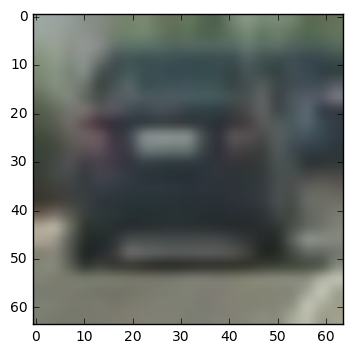

In [74]:
sample_image_path = vehicles[0]
sample_image = (mpimg.imread(sample_image_path) * 255).astype(np.uint8)
print(sample_image.shape)
plt.imshow(sample_image)

## Extract features from images using various techniques

In [172]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

features.shape for feature_vector = True is: (509436,)
features.shape for feature_vector = False is: (89, 159, 2, 2, 9)


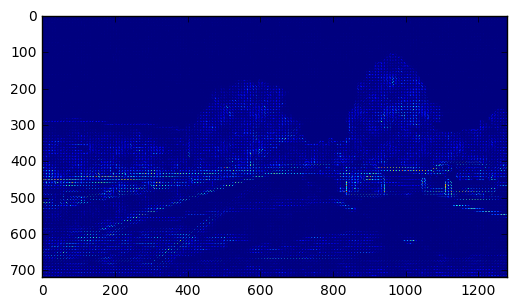

In [174]:
orient = 9 # setting the number of bins so 9 bins would mean each bin is 40 degrees
pix_per_cell = 8 # setting the number of pixels that make up a cell, these cells are how the hog features are created
cell_per_block = 2 # this specifies the width/length of a square kernel
features, hog_image_1 = get_hog_features(sample_image[:,:,0], orient, pix_per_cell, cell_per_block, vis = True)
print("features.shape for feature_vector = True is: {}".format(features.shape)) 

# as our picture is 64 x 64, we would have 64/8 = 8 cells on each side, so a total of 64 cells
features, hog_image_2 = get_hog_features(sample_image[:,:,0], orient, pix_per_cell, cell_per_block, vis = True, feature_vec = False)

print("features.shape for feature_vector = False is: {}".format(features.shape)) 

plt.imshow(hog_image_1)

In [175]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

In [176]:
# Using the pure pixel values
spatial_features = bin_spatial(sample_image)
print(spatial_features.shape)

(3072,)


In [177]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [178]:
# Using the binned pixel values
color_hist_features = color_hist(sample_image)
print(color_hist_features.shape)

(96,)


In [179]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = (mpimg.imread(file) * 255).astype(np.uint8)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: 
            feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features 

## Train the Linear SVC

In [ ]:
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 720] # Min and max in y to search in slide_window()

vehicle_features = extract_features(vehicles, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
non_vehicle_features = extract_features(non_vehicles, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
X = np.vstack((vehicle_features, non_vehicle_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(vehicle_features)), np.zeros(len(non_vehicle_features))))

In [ ]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2)
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = svm.LinearSVC()
# Check the training time for the SVC
svc.fit(X_train, y_train)
# Check the score of the SVC
print('Validation Accuracy of SVC = ', round(svc.score(X_val, y_val), 4))
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
Validation Accuracy of SVC =  0.9916
Test Accuracy of SVC =  0.9916


## Implement sliding windows to extract patches of features from the image for classification

In [ ]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop == [None, None]:
        x_start_stop = [0, img.shape[1]]
    if y_start_stop == [None, None]:
        y_start_stop = [0, img.shape[0]]
        
    # Compute the span of the region to be searched    
    span_x = x_start_stop[1] - x_start_stop[0]
    span_y = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    pixel_per_step_x = int(xy_window[0] * xy_overlap[0])
    pixel_per_step_y = int(xy_window[1] * xy_overlap[1])
    
    # Compute the number of windows in x/y
    number_of_windows_x = span_x//pixel_per_step_x + 1
    number_of_windows_y = span_y//pixel_per_step_y + 1
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
    for i in range(number_of_windows_x):
        for j in range(number_of_windows_y):
        # Calculate each window position
            x1 = x_start_stop[0] + i * pixel_per_step_x
            y1 = y_start_stop[0] + j * pixel_per_step_y
            x2 = x_start_stop[1] + i * pixel_per_step_x
            y2 = y_start_stop[1] + j * pixel_per_step_y
            window_pos = ((x1, y1), (x2, y2))
            # Append window position to list
            window_list.append(window_pos)
    # Return the list of windows
    return window_list

In [ ]:
# Test this function
sample_image = lane_line_images[5]
windows = slide_window(sample_image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(sample_image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

## Classify the boxes that were found and see if it is a car

In [ ]:
def convert_color(image, color_space ='RGB'):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(image)
    return(feature_image)

def find_cars(img, y_start, y_stop, scale , model, X_scaler, orient,\
             pix_per_cell, cell_per_block, spatial_size, hist_bins):
    draw_img = np.copy(img)
    bboxes = []
    img_to_search = img[y_start:y_stop, :, :]
    color_space_to_search = convert_color(img_to_search, color_space ='HSV')
    if scale != 1:
        imshape = color_space_to_search.shape
        color_space_to_search = cv2.resize(color_space_to_search, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    # Get the color channels
    ch1 = color_space_to_search[:, :, 0]
    ch2 = color_space_to_search[:, :, 1]
    ch3 = color_space_to_search[:, :, 2]
    
    # Get the number of blocks in the image
    nxblocks = (ch1.shape[1] // pix_per_cell) - 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - 1
    
    n_feat_per_block = orient * cell_per_block ** 2
    
    # Partition the image 
    window = 64
    n_blocks_per_window = (window // pix_per_cell) - 1
    cells_per_step = 2
    nxsteps = (nxblocks - n_blocks_per_window) // cells_per_step
    nysteps = (nyblocks - n_blocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            # See which "block" we are currently on
            ypos = yb * cells_per_step 
            xpos = xb * cells_per_step
            
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+n_blocks_per_window, xpos:xpos+n_blocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+n_blocks_per_window, xpos:xpos+n_blocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+n_blocks_per_window, xpos:xpos+n_blocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            # See what "pixel" we are currently on
            xleft = xpos * pix_per_cell 
            ytop = ypos * pix_per_cell
            
            # Extract the image patch
            subimg = cv2.resize(color_space_to_search[ytop:ytop+window, xleft:xleft+window], (64,64))
            
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            
#             print(hog_features.shape)
#             print(spatial_features.shape)
#             print(hist_features.shape)
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                # scale up to original image size
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bbox = ((xbox_left, ytop_draw+ystart), (xbox_left+win_draw,ytop_draw+win_draw+ystart))
                bboxes.append(bbox)
                
    return draw_img, bboxes
    
ystart = 400
ystop = 656

# if the scale is smaller than it means that the image will get scaled down meaning that 
# the boxes we fit on the image will be larger so ideally, we want to use 
# different scales to detect cars at different distances

# due to the way that the classifiers were trained, we need the boxes that 
# capture the car to look similar to the ones we have in our training images
scale = 1.75 
    
out_img, bboxes = find_cars(sample_image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
print(bboxes)

In [ ]:
# Plot the results
fig = plt.figure()
plt.subplot(121)
plt.imshow(out_img)
plt.subplot(122)
plt.imshow(convert_color(sample_image, "HSV"))

## Using a heat map to decide how many cars are in our image

In [ ]:
from scipy.ndimage.measurements import label
def add_heat(heat, bboxes):
    for bbox in bboxes:
        heat[bbox[0][1] : bbox[1][1], bbox[0][0] : bbox[1][0]] += 1
    return heat

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# create heat map
heat = np.zeros_like(sample_image[:,:,0])

# add heat
heat = add_heat(heat, bboxes)

# threshold it to avoid false positives
heat = apply_threshold(heat, 1)

# find the number of cars
labels = label(heat)
draw_img = draw_labeled_bboxes(np.copy(sample_image), labels)
print("There are: {} cars".format(labels[1]))
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 15))
ax1.imshow(heat, cmap = 'hot') 
ax2.imshow(draw_img)
